In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-gdp-world-countries/__results__.html
/kaggle/input/predicting-gdp-world-countries/__output__.json
/kaggle/input/predicting-gdp-world-countries/custom.css
/kaggle/input/predicting-gdp-world-countries/__results___files/__results___11_0.png
/kaggle/input/predicting-gdp-world-countries/__results___files/__results___14_0.png
/kaggle/input/predicting-gdp-world-countries/__results___files/__results___13_0.png
/kaggle/input/countries-gdp-19602020/Countries GDP 1960-2020.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv
/kaggle/input/world-population-dataset/world_population.csv


# Load Datasets 

In [80]:
pop = pd.read_csv('/kaggle/input/world-population-dataset/world_population.csv')
pop.head()
pop.rename(columns={
    '2022 Population': '2022',
    '2020 Population': '2020',
    '2015 Population': '2015',
    '2010 Population': '2010',
    '2000 Population': '2000',
    '1990 Population': '1990',
    '1980 Population': '1980',
    '1970 Population': '1970',
}, inplace=True)
pop = pop[['CCA3', '2022', '2020', '2015', '2010', '2000', '1990', '1980', '1970']]
pop

,CCA3,2022,2020,2015,2010,2000,1990,1980,1970
0,AFG,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971
1,ALB,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731
2,DZA,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915
3,ASM,44273,46189,51368,54849,58230,47818,32886,27075
4,AND,79824,77700,71746,71519,66097,53569,35611,19860
...,...,...,...,...,...,...,...,...,...
229,WLF,11572,11655,12182,13142,14723,13454,11315,9377
230,ESH,575986,556048,491824,413296,270375,178529,116775,76371
231,YEM,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607
232,ZMB,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671


In [81]:
gdp = pd.read_csv('/kaggle/input/countries-gdp-19602020/Countries GDP 1960-2020.csv')
gdp

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.430000e+11,9.510000e+11,9.640000e+11,9.850000e+11,9.200000e+11,8.730000e+11,9.850000e+11,1.010000e+12,1.010000e+12,9.210000e+11
1,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,6.710000e+11,7.280000e+11,8.210000e+11,8.650000e+11,7.610000e+11,6.910000e+11,6.840000e+11,7.420000e+11,7.950000e+11,7.850000e+11
2,Australia,AUS,1.860679e+10,1.968306e+10,1.992272e+10,2.153993e+10,2.380110e+10,2.597715e+10,2.730989e+10,3.044462e+10,...,1.400000e+12,1.550000e+12,1.580000e+12,1.470000e+12,1.350000e+12,1.210000e+12,1.330000e+12,1.430000e+12,1.390000e+12,1.330000e+12
3,Austria,AUT,6.592694e+09,7.311750e+09,7.756110e+09,8.374175e+09,9.169984e+09,9.994071e+09,1.088768e+10,1.157943e+10,...,4.310000e+11,4.090000e+11,4.300000e+11,4.420000e+11,3.820000e+11,3.960000e+11,4.160000e+11,4.550000e+11,4.450000e+11,4.330000e+11
4,Burundi,BDI,1.960000e+08,2.030000e+08,2.135000e+08,2.327500e+08,2.607500e+08,1.589950e+08,1.654446e+08,1.782971e+08,...,2.235821e+09,2.333308e+09,2.451625e+09,2.705783e+09,3.104395e+09,2.732809e+09,2.748180e+09,2.668496e+09,2.631434e+09,2.841786e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,St. Vincent and the Grenadines,VCT,1.306656e+07,1.399988e+07,1.452488e+07,1.370822e+07,1.475821e+07,1.510821e+07,1.609987e+07,1.583518e+07,...,6.761296e+08,6.929333e+08,7.212074e+08,7.277148e+08,7.554000e+08,7.744296e+08,7.921778e+08,8.113000e+08,8.250407e+08,8.074741e+08
116,World,WLD,1.390000e+12,1.440000e+12,1.550000e+12,1.670000e+12,1.820000e+12,1.990000e+12,2.160000e+12,2.290000e+12,...,7.370000e+13,7.530000e+13,7.740000e+13,7.960000e+13,7.510000e+13,7.630000e+13,8.120000e+13,8.630000e+13,8.760000e+13,8.470000e+13
117,South Africa,ZAF,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,1.377739e+10,...,4.580000e+11,4.340000e+11,4.010000e+11,3.810000e+11,3.470000e+11,3.240000e+11,3.810000e+11,4.050000e+11,3.880000e+11,3.350000e+11
118,Zambia,ZMB,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


In [82]:
olympic_data = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [83]:
noc_country = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv')
noc_country.drop('notes', axis = 1 , inplace = True)
noc_country.rename(columns = {'region':'Country'}, inplace = True)

noc_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


# Data Cleaning


In [84]:
print(olympic_data.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [85]:
#fill in medal na value as loss
olympic_data['Medal'].fillna('LOS', inplace = True)

/tmp/ipykernel_33/1626602096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympic_data['Medal'].fillna('LOS', inplace = True)


In [86]:
#verify mapping mapping between NOC and team
print(olympic_data.loc[:, ['NOC', 'Team']].drop_duplicates()['NOC'].value_counts().head())


NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
Name: count, dtype: int64



shows that some NOC is mapped to multiple teams(country names)

In [87]:
#merge olympic dataset with NOC country dataset with NOC as primary key 
#use left join to return all records from left(olympic) dataset and their match from noc country
olympics_merge = olympic_data.merge(noc_country,
                                left_on = 'NOC',
                                right_on = 'NOC',
                                how = 'left')

In [88]:
#find NOC that does not have matching country 
olympics_merge.loc[olympics_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()


,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [89]:
#manual insert country located with NOC
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='SGP', 'Singapore', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='ROT', 'Refugee Olympic Athletes', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='UNK', 'Unknown', olympics_merge['Country'])
olympics_merge['Country'] = np.where(olympics_merge['NOC']=='TUV', 'Tuvalu', olympics_merge['Country'])

In [90]:
#migrate value from country to team
olympics_merge.drop('Team', axis = 1, inplace = True)


# Merge Socioeconomical data

In [91]:
olympics_merge

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,LOS,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,LOS,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,LOS,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,LOS,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,LOS,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",LOS,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",LOS,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,LOS,Poland


In [92]:
gp_olympics = olympics_merge.loc[: , ['Year','Country', 'Medal']].groupby(['Year'])


In [93]:
olympics_merge['Gold'] = np.where(olympics_merge['Medal'] == 'Gold', 1, 0)
olympics_merge['Silver'] = np.where(olympics_merge['Medal'] == 'Silver', 1, 0)
olympics_merge['Bronze'] = np.where(olympics_merge['Medal'] == 'Bronze', 1, 0)
olympics_merge['Total'] = olympics_merge['Gold'] + olympics_merge['Silver']+olympics_merge['Bronze']
olympics_merge
olympics_merge.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Gold,Silver,Bronze,Total
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,LOS,China,0,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,LOS,China,0,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,LOS,Denmark,0,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0,0,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,LOS,Netherlands,0,0,0,0


In [94]:
medal_counts = olympics_merge.groupby(['Year', 'Country'])[['Gold', 'Silver', 'Bronze']].sum().reset_index()

In [95]:
medal_counts['Total'] = medal_counts['Gold'] + medal_counts['Silver'] + medal_counts['Bronze']
medal_counts.head()

,Year,Country,Gold,Silver,Bronze,Total
0,1896,Australia,2,0,1,3
1,1896,Austria,2,1,2,5
2,1896,Denmark,1,2,3,6
3,1896,France,5,4,2,11
4,1896,Germany,25,5,2,32


In [96]:
sorted_medal_counts = medal_counts.sort_values(by=['Country', 'Year'])
sorted_medal_counts = sorted_medal_counts[['Year', 'Country', 'Total']]
sorted_medal_counts

,Year,Country,Total
296,1936,Afghanistan,0
346,1948,Afghanistan,0
474,1956,Afghanistan,0
548,1960,Afghanistan,0
631,1964,Afghanistan,0
...,...,...,...
2418,2004,Zimbabwe,3
2699,2008,Zimbabwe,4
2984,2012,Zimbabwe,0
3072,2014,Zimbabwe,0


In [97]:
pivot_medal_counts = sorted_medal_counts.pivot(index='Country', columns='Year', values='Total')
pivot_medal_counts.fillna(0, inplace=True)

In [98]:
pivot_medal_counts

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Virgin Islands, British",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Virgin Islands, US",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
pivot_medal_counts.to_csv('medal_counts_pivot.csv')

In [100]:
cumulative_medals = pivot_medal_counts.cumsum(axis=1)
cumulative_medals

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,12.0,12.0,12.0,12.0,14.0,14.0,15.0,15.0,17.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Virgin Islands, British",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Virgin Islands, US",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
cumulative_medals.to_csv('cumulative_medals.csv')

# **Merge GDP Data to Olympics Data**

In [102]:
gdp_melted = gdp.melt(id_vars=["Country Name","Country Code"], 
                                     var_name="Year", 
                                     value_name="GDP")
gdp_melted['Year'] = gdp_melted['Year'].astype(int)

In [103]:
gdp_melted

,Country Name,Country Code,Year,GDP
0,Africa Eastern and Southern,AFE,1960,1.931311e+10
1,Africa Western and Central,AFW,1960,1.040428e+10
2,Australia,AUS,1960,1.860679e+10
3,Austria,AUT,1960,6.592694e+09
4,Burundi,BDI,1960,1.960000e+08
...,...,...,...,...
7315,St. Vincent and the Grenadines,VCT,2020,8.074741e+08
7316,World,WLD,2020,8.470000e+13
7317,South Africa,ZAF,2020,3.350000e+11
7318,Zambia,ZMB,2020,1.811063e+10


**Merge based on Country Code**

In [104]:
olympics_merge = pd.merge(olympics_merge, gdp_melted, left_on=['NOC', 'Year'], right_on=['Country Code', 'Year'], how='left')


In [105]:
olympics_merge

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Event,Medal,Country,Gold,Silver,Bronze,Total,Country Name,Country Code,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,...,Basketball Men's Basketball,LOS,China,0,0,0,0,China,CHN,4.270000e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,Judo Men's Extra-Lightweight,LOS,China,0,0,0,0,China,CHN,8.530000e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,...,Football Men's Football,LOS,Denmark,0,0,0,0,NaN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,...,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0,0,1,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,Speed Skating Women's 500 metres,LOS,Netherlands,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,...,Luge Mixed (Men)'s Doubles,LOS,Poland,0,0,0,0,NaN,NaN,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,...,"Ski Jumping Men's Large Hill, Individual",LOS,Poland,0,0,0,0,NaN,NaN,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,...,"Ski Jumping Men's Large Hill, Team",LOS,Poland,0,0,0,0,NaN,NaN,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,...,Bobsleigh Men's Four,LOS,Poland,0,0,0,0,NaN,NaN,NaN


In [106]:
# Drop the redundant 'Country Name' column from the merged dataframe
olympics_merge.drop(columns=['Country Name', 'Country Code'], inplace=True)
olympics_merge

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Gold,Silver,Bronze,Total,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,LOS,China,0,0,0,0,4.270000e+11
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,LOS,China,0,0,0,0,8.530000e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,LOS,Denmark,0,0,0,0,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0,0,1,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,LOS,Netherlands,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,LOS,Poland,0,0,0,0,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",LOS,Poland,0,0,0,0,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",LOS,Poland,0,0,0,0,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,LOS,Poland,0,0,0,0,NaN


In [107]:
medal_gdp = olympics_merge.groupby(['Year', 'Country'])[['Gold', 'Silver', 'Bronze', 'GDP']].sum().reset_index()
medal_gdp['Total'] = medal_gdp['Gold'] + medal_gdp['Silver'] + medal_gdp['Bronze']
medal_gdp = medal_gdp[['Year', 'Country', 'Total', 'GDP']]
medal_gdp

,Year,Country,Total,GDP
0,1896,Australia,3,0.0
1,1896,Austria,5,0.0
2,1896,Denmark,6,0.0
3,1896,France,11,0.0
4,1896,Germany,32,0.0
...,...,...,...,...
3274,2016,"Virgin Islands, British",0,0.0
3275,2016,"Virgin Islands, US",0,0.0
3276,2016,Yemen,0,0.0
3277,2016,Zambia,0,0.0


In [108]:
#Medal by Country
medal_by_country = medal_gdp.groupby(['Country'])['Total'].sum().reset_index()
medal_by_country

,Country,Total
0,Afghanistan,2
1,Albania,0
2,Algeria,17
3,American Samoa,0
4,Andorra,0
...,...,...
204,"Virgin Islands, British",0
205,"Virgin Islands, US",1
206,Yemen,0
207,Zambia,2


In [109]:
medal_by_country.sort_values(by=['Total'], ascending=False)

,Country,Total
194,USA,5637
152,Russia,3947
67,Germany,3756
193,UK,2068
63,France,1777
...,...,...
157,Samoa,0
156,Saint Vincent,0
155,Saint Lucia,0
154,Saint Kitts,0


In [110]:
medal_by_country.to_csv('medal_by_country.csv')

# **Merge Population to Olympics Data**

In [111]:
pop_long = pop.melt(id_vars=["CCA3"], 
                                     var_name="Year", 
                                     value_name="Population")
pop_long

,CCA3,Year,Population
0,AFG,2022,41128771
1,ALB,2022,2842321
2,DZA,2022,44903225
3,ASM,2022,44273
4,AND,2022,79824
...,...,...,...
1867,WLF,1970,9377
1868,ESH,1970,76371
1869,YEM,1970,6843607
1870,ZMB,1970,4281671


In [112]:
pop_long['Year'] = pop_long['Year'].str.extract('(\d+)').astype(int)

In [113]:
population_years = sorted(pop_long['Year'].unique())

# Function to map each Olympic year to the nearest subsequent population year
def map_to_population_year(olympic_year, population_years):
    for year in population_years:
        if year >= olympic_year:
            return year
    return population_years[-1]

# Apply the mapping function to create a new column in the Olympic data
olympics_merge['Population_Year'] = olympics_merge['Year'].apply(lambda x: map_to_population_year(x, population_years))


In [114]:
olympics_merge

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Sport,Event,Medal,Country,Gold,Silver,Bronze,Total,GDP,Population_Year
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,...,Basketball,Basketball Men's Basketball,LOS,China,0,0,0,0,4.270000e+11,2000
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,Judo,Judo Men's Extra-Lightweight,LOS,China,0,0,0,0,8.530000e+12,2015
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,...,Football,Football Men's Football,LOS,Denmark,0,0,0,0,NaN,1970
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,...,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1,0,0,1,NaN,1970
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,Speed Skating,Speed Skating Women's 500 metres,LOS,Netherlands,0,0,0,0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,...,Luge,Luge Mixed (Men)'s Doubles,LOS,Poland,0,0,0,0,NaN,1980
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,...,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",LOS,Poland,0,0,0,0,NaN,2015
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,...,Ski Jumping,"Ski Jumping Men's Large Hill, Team",LOS,Poland,0,0,0,0,NaN,2015
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,...,Bobsleigh,Bobsleigh Men's Four,LOS,Poland,0,0,0,0,NaN,2000


In [115]:
olympics_merge = pd.merge(olympics_merge, 
                     pop_long, 
                     left_on=['NOC', 'Population_Year'], 
                     right_on=['CCA3', 'Year'], 
                     how='left')

In [116]:
olympics_merge

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year_x,Season,...,Country,Gold,Silver,Bronze,Total,GDP,Population_Year,CCA3,Year_y,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,...,China,0,0,0,0,4.270000e+11,2000,CHN,2000.0,1.264099e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,China,0,0,0,0,8.530000e+12,2015,CHN,2015.0,1.393715e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,...,Denmark,0,0,0,0,NaN,1970,NaN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,...,Denmark,1,0,0,1,NaN,1970,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,Netherlands,0,0,0,0,NaN,1990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,...,Poland,0,0,0,0,NaN,1980,POL,1980.0,3.552143e+07
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,...,Poland,0,0,0,0,NaN,2015,POL,2015.0,3.855315e+07
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,...,Poland,0,0,0,0,NaN,2015,POL,2015.0,3.855315e+07
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,...,Poland,0,0,0,0,NaN,2000,POL,2000.0,3.850443e+07


In [117]:
olympics_merge.rename(columns={'Year_x': 'Year'}, inplace=True)

In [118]:
olympics_merge.to_csv('olympics_merge.csv')

In [119]:
# Group by country and year
grouped = olympics_merge.groupby(['Country', 'Year'])

# Calculate total number of athletes
total_athletes = grouped['ID'].nunique().reset_index(name='Total_Athletes')

# Calculate total number of medals
total_medals = grouped[['Gold', 'Silver', 'Bronze']].sum().reset_index()
total_medals['Total_Medals'] = total_medals['Gold'] + total_medals['Silver'] + total_medals['Bronze']

# Get GDP and Population
gdp_population = grouped[['GDP', 'Population']].first().reset_index()

# Merge all the aggregated data
summary_table = total_athletes.merge(total_medals, on=['Country', 'Year']).merge(gdp_population, on=['Country', 'Year'])

# Select and rename columns
summary_table = summary_table[['Country', 'Year', 'Total_Athletes', 'Total_Medals', 'GDP', 'Population']]
#summary_table.rename(columns={'Year_x': 'Year'}, inplace=True)


In [120]:
summary_table.sort_values(by=['Year','Total_Medals'], ascending=False).head(10)

,Country,Year,Total_Athletes,Total_Medals,GDP,Population
3099,USA,2016,555,264,1.870000e+13,3.359420e+08
1091,Germany,2016,418,159,NaN,NaN
3064,UK,2016,360,145,2.720000e+12,6.705947e+07
2455,Russia,2016,284,115,NaN,1.456173e+08
630,China,2016,429,113,1.120000e+13,1.424930e+09
1028,France,2016,392,96,2.470000e+12,6.448005e+07
170,Australia,2016,420,82,1.210000e+12,2.567005e+07
1463,Italy,2016,309,72,1.880000e+12,5.950058e+07
536,Canada,2016,310,69,1.530000e+12,3.788870e+07
1527,Japan,2016,335,64,5.000000e+12,1.252448e+08


In [121]:
summary_table.isnull().sum()

Country              0
Year                 0
Total_Athletes       0
Total_Medals         0
GDP               2457
Population        1313
dtype: int64

In [122]:
df_clean = summary_table.dropna()
# df_clean = summary_table[summary_table['Total_Medals'] > 0]

# Calculate the correlation on the cleaned data
correlation_clean = df_clean['GDP'].corr(df_clean['Total_Medals'])
correlation_clean #0.5628299203660194

#correlation_clean = df_clean['Population'].corr(df_clean['Total_Medals'])
correlation_clean #0.19347726792496253

#correlation_clean = df_clean['Population'].corr(df_clean['GDP'])
correlation_clean #0.3362709829571209

#correlation_clean = df_clean['Population'].corr(df_clean['Total_Athletes'])
#correlation_clean #0.18559876151137952

# #0.43797881009681316

0.5993074311969694

# Machine Learning Prediction 

In [123]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

**Using the summary table to predict the total number of medals a country can win**

In [124]:

#olympics_df = summary_table[summary_table['Total_Medals'] > 0]

summary_table = summary_table.dropna()

In [125]:
summary_table

,Country,Year,Total_Athletes,Total_Medals,GDP,Population
150,Australia,1960,219,46,1.860679e+10,12595034.0
151,Australia,1964,248,44,2.380110e+10,12595034.0
152,Australia,1968,131,51,3.271699e+10,12595034.0
153,Australia,1972,172,20,5.205140e+10,14706322.0
154,Australia,1976,188,23,1.050000e+11,14706322.0
...,...,...,...,...,...,...
3110,Uganda,2000,13,0,6.193247e+09,24020697.0
3111,Uganda,2004,11,0,7.939487e+09,32341728.0
3112,Uganda,2008,11,0,1.444040e+10,32341728.0
3113,Uganda,2012,15,1,2.730592e+10,37477356.0


In [126]:
features = ['Total_Athletes', 'GDP', 'Population']
target = 'Total_Medals'

X = summary_table[features]
y = summary_table[target]

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[['Total_Athletes', 'GDP', 'Population']] = scaler.fit_transform(X_train[['Total_Athletes', 'GDP', 'Population']])
X_test[['Total_Athletes', 'GDP', 'Population']] = scaler.transform(X_test[['Total_Athletes', 'GDP', 'Population']])

**Random Forest**

In [128]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 167.93488787878786
R^2 Score: 0.8605981449510852


**XGBoost**

In [130]:
import xgboost as xgb
from xgboost import XGBRegressor

# Train an XGBoost Regressor model
xg_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Mean Squared Error: 187.99223757718997
R^2 Score: 0.8439486459063116


Text(0.5, 1.0, 'Feature Importance in Medal Prediction with XGBoost')

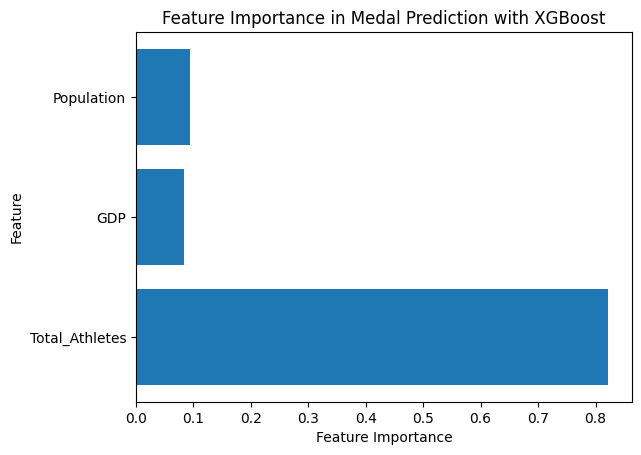

In [131]:
# Make predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Display feature importances
import matplotlib.pyplot as plt

feature_importances = xg_reg.feature_importances_
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Medal Prediction with XGBoost')

**Predict whether or not a person can win a medal**

In [132]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [133]:
olympics_merge

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,...,Country,Gold,Silver,Bronze,Total,GDP,Population_Year,CCA3,Year_y,Population
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,...,China,0,0,0,0,4.270000e+11,2000,CHN,2000.0,1.264099e+09
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,...,China,0,0,0,0,8.530000e+12,2015,CHN,2015.0,1.393715e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,1920,Summer,...,Denmark,0,0,0,0,NaN,1970,NaN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,...,Denmark,1,0,0,1,NaN,1970,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,1988,Winter,...,Netherlands,0,0,0,0,NaN,1990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,1976,Winter,...,Poland,0,0,0,0,NaN,1980,POL,1980.0,3.552143e+07
271112,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,...,Poland,0,0,0,0,NaN,2015,POL,2015.0,3.855315e+07
271113,135570,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,2014,Winter,...,Poland,0,0,0,0,NaN,2015,POL,2015.0,3.855315e+07
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,1998,Winter,...,Poland,0,0,0,0,NaN,2000,POL,2000.0,3.850443e+07


In [134]:
olympics_df = olympics_merge[['Age', 'Height', 'Weight', 'Year', 'Sport', 'Sex', 'Total', 'Country']]
olympics_df

,Age,Height,Weight,Year,Sport,Sex,Total,Country
0,24.0,180.0,80.0,1992,Basketball,M,0,China
1,23.0,170.0,60.0,2012,Judo,M,0,China
2,24.0,NaN,NaN,1920,Football,M,0,Denmark
3,34.0,NaN,NaN,1900,Tug-Of-War,M,1,Denmark
4,21.0,185.0,82.0,1988,Speed Skating,F,0,Netherlands
...,...,...,...,...,...,...,...,...
271111,29.0,179.0,89.0,1976,Luge,M,0,Poland
271112,27.0,176.0,59.0,2014,Ski Jumping,M,0,Poland
271113,27.0,176.0,59.0,2014,Ski Jumping,M,0,Poland
271114,30.0,185.0,96.0,1998,Bobsleigh,M,0,Poland


In [135]:
olympics_df.isna().sum()

Age         9474
Height     60171
Weight     62875
Year           0
Sport          0
Sex            0
Total          0
Country        0
dtype: int64

In [136]:
olympics_df = olympics_df.dropna()

In [138]:
olympics_df = pd.get_dummies(olympics_df, columns=['Sex','Sport','Country'], drop_first=True)
olympics_df

,Age,Height,Weight,Year,Total,Sex_M,Sport_Archery,Sport_Art Competitions,Sport_Athletics,Sport_Badminton,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,"Country_Virgin Islands, British","Country_Virgin Islands, US",Country_Yemen,Country_Zambia,Country_Zimbabwe
0,24.0,180.0,80.0,1992,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,23.0,170.0,60.0,2012,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,21.0,185.0,82.0,1988,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,21.0,185.0,82.0,1988,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,25.0,185.0,82.0,1992,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,29.0,179.0,89.0,1976,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271112,27.0,176.0,59.0,2014,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271113,27.0,176.0,59.0,2014,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
271114,30.0,185.0,96.0,1998,0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [139]:
X = olympics_df.drop(columns=['Total'])
y = olympics_df['Total']

In [140]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[['Age', 'Height', 'Weight']] = scaler.fit_transform(X_train[['Age', 'Height', 'Weight']])
X_test[[ 'Age', 'Height', 'Weight']] = scaler.transform(X_test[['Age', 'Height', 'Weight']])

In [141]:
# Train an XGBoost Classifier model
from xgboost import XGBClassifier

xg_clf = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xg_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = xg_clf.predict(X_test)
y_pred_proba = xg_clf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")



# Accuracy: 0.8645774755891825
# Confusion Matrix:
# [[16631   174]
#  [ 2475   281]]
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.87      0.99      0.93     16805
#            1       0.62      0.10      0.18      2756

#     accuracy                           0.86     19561
#    macro avg       0.74      0.55      0.55     19561
# weighted avg       0.83      0.86      0.82     19561




# Display the first few probabilities of winning a medal
print(y_pred_proba[:10])

Accuracy: 0.8794897291004777
Confusion Matrix:
[[34826   364]
 [ 4605  1438]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     35190
           1       0.80      0.24      0.37      6043

    accuracy                           0.88     41233
   macro avg       0.84      0.61      0.65     41233
weighted avg       0.87      0.88      0.85     41233

[0.31746265 0.25316837 0.03770661 0.03907688 0.2457248  0.01681708
 0.09613161 0.2332633  0.1371682  0.04231054]


In [143]:
import pickle
data = {"model": xg_clf}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
y_pred = regressor_loaded.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred[:20]

In [ ]:
olympics_df

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
import pickle

# Encode categorical variables
le_sex = LabelEncoder()
le_sport = LabelEncoder()
le_country = LabelEncoder()

olympics_df['Sex'] = le_sex.fit_transform(olympics_df['Sex'])
olympics_df['Sport'] = le_sport.fit_transform(olympics_df['Sport'])
olympics_df['Country'] = le_country.fit_transform(olympics_df['Country'])

# Define features and target
X = olympics_df.drop(columns=['Total'])
y = olympics_df['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train[['Age', 'Height', 'Weight']] = scaler.fit_transform(X_train[['Age', 'Height', 'Weight']])
X_test[['Age', 'Height', 'Weight']] = scaler.transform(X_test[['Age', 'Height', 'Weight']])

# Train the XGBoost Classifier model
xg_clf = XGBClassifier(objective='binary:logistic', n_estimators=100, random_state=42)
xg_clf.fit(X_train, y_train)

# Save the model, scaler, and encoders
model_data = {
    "model": xg_clf,
    "scaler": scaler,
    "le_sex": le_sex,
    "le_sport": le_sport,
    "le_country": le_country
}

with open('olympics_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

print("Model, scaler, and encoders saved to 'olympics_model.pkl'")